In [1]:
import math
import yfinance as yf
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, skew, kurtosis, shapiro
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = yf.download("SPY", start="2018-01-01", end="2018-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace = True)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,267.839996,268.809998,267.399994,268.769989,248.918121,86655700
1,2018-01-03,268.959991,270.640015,268.959991,270.470001,250.492599,90070400
2,2018-01-04,271.200012,272.160004,270.540009,271.609985,251.548279,80636400
3,2018-01-05,272.510010,273.559998,271.950012,273.420013,253.224716,83524000
4,2018-01-08,273.309998,274.100006,272.980011,273.920013,253.687729,57319200


In [5]:
data.drop(columns = ['Adj Close','Volume','Date'],axis=0,inplace=True)

In [6]:
data['Open'] = data['Open'].astype(int)
data['Close'] = data['Close'].astype(int)
data['High'] = data['High'].astype(int)
data['Low'] = data['Low'].astype(int)

In [7]:
X_open = data.drop(columns=['Open'])
y_open = data['Open']
X_close = data.drop(columns=['Close'])
y_close = data['Close']

In [8]:
data_pred_svc = pd.DataFrame(columns=['action','gain/loss','ratio','Day'])
data_pred_regressor = pd.DataFrame(columns=['action','gain/loss','ratio','Day'])
data_pred_knn = pd.DataFrame(columns=['action','gain/loss','ratio','Day'])

**Predicting the opening price**

In [9]:
model_open_svc = SVC()
model_open_svc.fit(X_open, y_open)
data_pred_svc['predicted Open'] = model_open_svc.predict(X_open)

model_open_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
model_open_regressor.fit(X_open, y_open)
data_pred_regressor['predicted Open'] = model_open_regressor.predict(X_open)

model_open_knn=KNeighborsRegressor(n_neighbors=3)
model_open_knn.fit(X_open, y_open)                  
data_pred_knn['predicted Open'] = model_open_knn.predict(X_open)

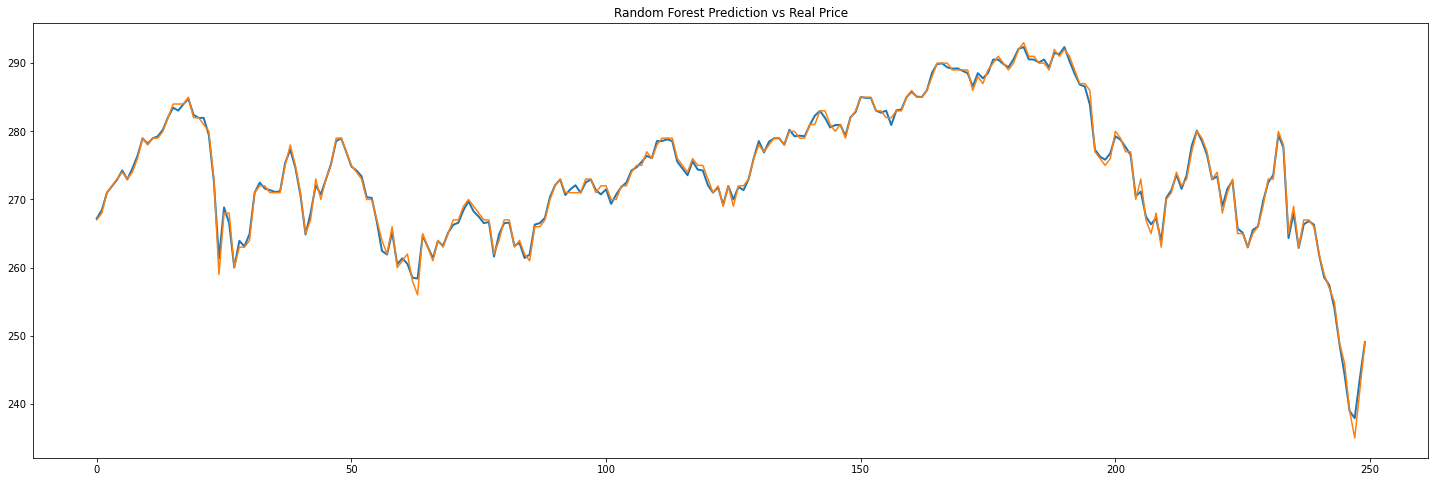

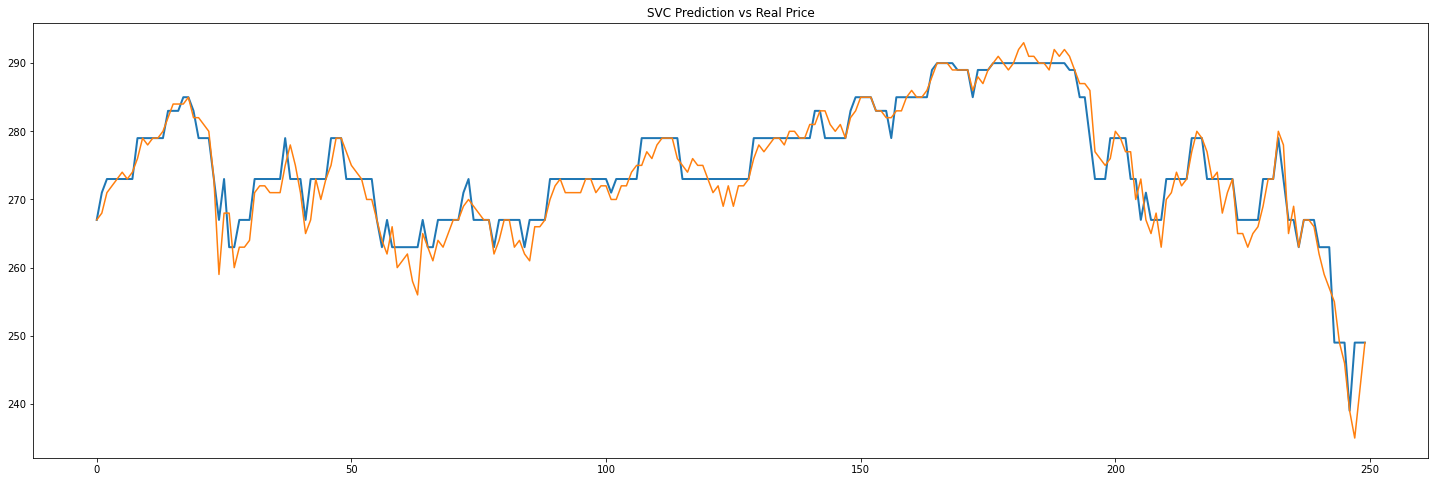

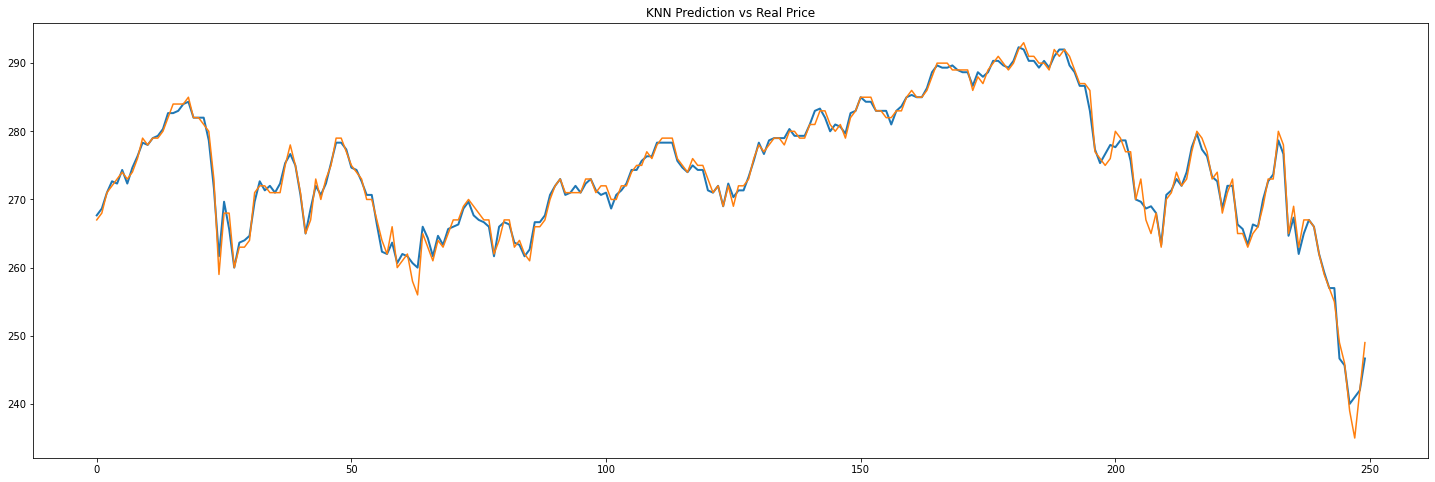

In [10]:
plt.figure(figsize=(25,8))
plt.title("Random Forest Prediction vs Real Price")
plt.plot(data_pred_regressor['predicted Open'],linewidth=2)
plt.plot(data['Open'])
plt.show()

plt.figure(figsize=(25,8))
plt.title("SVC Prediction vs Real Price")
plt.plot(data_pred_svc['predicted Open'],linewidth=2)
plt.plot(data['Open'])
plt.show()

plt.figure(figsize=(25,8))
plt.title("KNN Prediction vs Real Price")
plt.plot(data_pred_knn['predicted Open'],linewidth=2)
plt.plot(data['Open'])
plt.show()

**Predicting the closing price**

In [11]:
model_close_svc = SVC()
model_close_svc.fit(X_close, y_close)
data_pred_svc['predicted Close'] = model_close_svc.predict(X_close)

model_close_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
model_close_regressor.fit(X_close, y_close)
data_pred_regressor['predicted Close'] = model_close_regressor.predict(X_close)

model_close_knn=KNeighborsRegressor(n_neighbors=3)
model_close_knn.fit(X_close, y_close)                  
data_pred_knn['predicted Close'] = model_close_knn.predict(X_close)

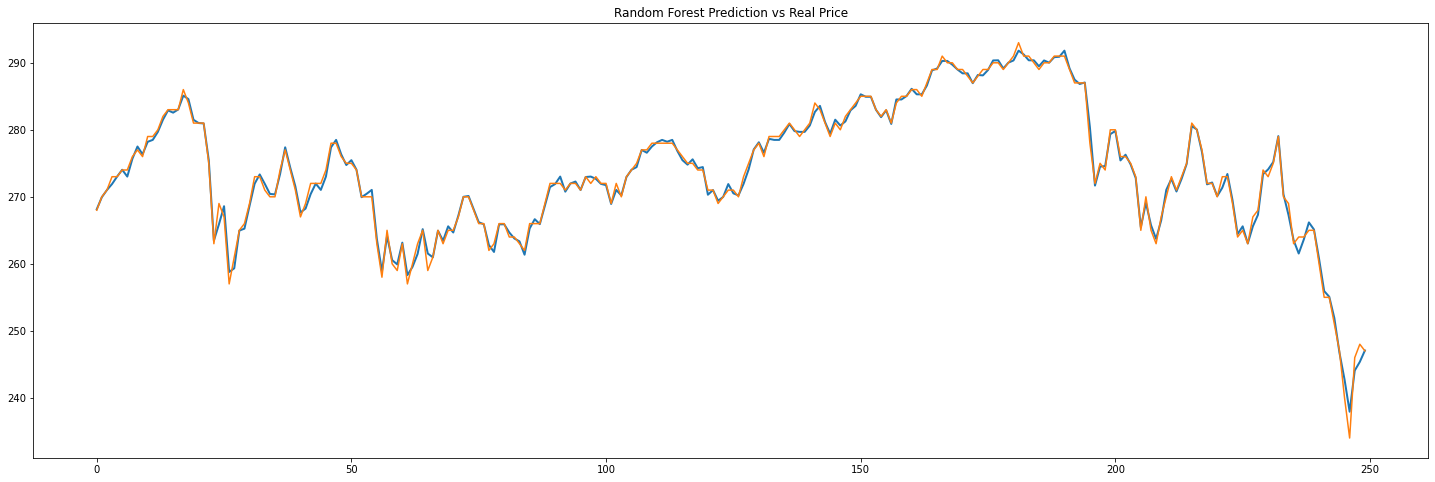

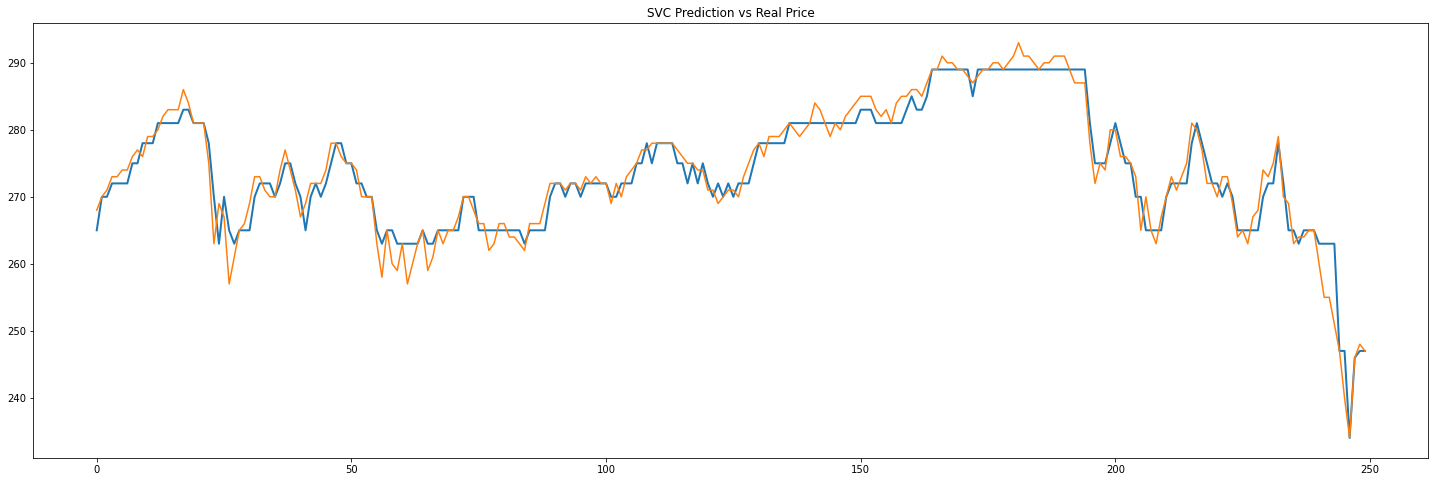

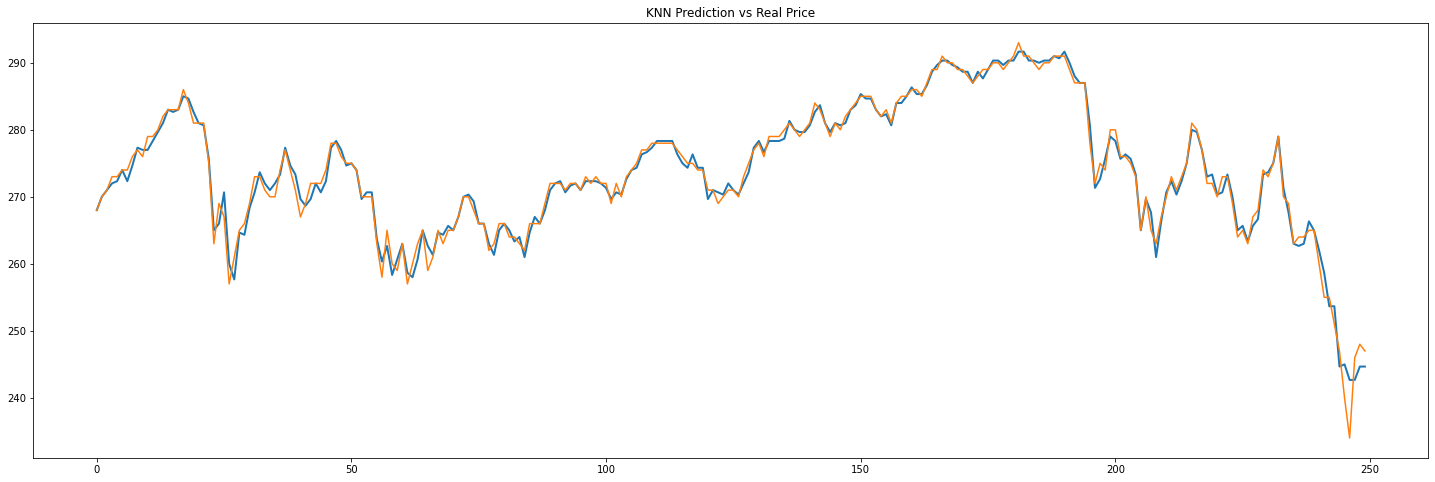

In [12]:
plt.figure(figsize=(25,8))
plt.title("Random Forest Prediction vs Real Price")
plt.plot(data_pred_regressor['predicted Close'],linewidth=2)
plt.plot(data['Close'])
plt.show()

plt.figure(figsize=(25,8))
plt.title("SVC Prediction vs Real Price")
plt.plot(data_pred_svc['predicted Close'],linewidth=2)
plt.plot(data['Close'])
plt.show()

plt.figure(figsize=(25,8))
plt.title("KNN Prediction vs Real Price")
plt.plot(data_pred_knn['predicted Close'],linewidth=2)
plt.plot(data['Close'])
plt.show()

**Defining the up/down trend for each model**

In [13]:
def up_down(data_pred):
    for i in range(0,len(data_pred)):
      if (data_pred['predicted Close'][i] > data_pred['predicted Open'][i]):
        data_pred['action'][i] = 'Up'
        data_pred["Day"][i] = str(i)
      elif (data_pred['predicted Close'][i] == data_pred['predicted Open'][i]):
        data_pred['action'][i]= 'Up'
        data_pred["Day"][i] = str(i)
      elif (data_pred['predicted Close'][i] < data_pred['predicted Open'][i]):
        data_pred['action'][i]= 'Down'
        data_pred["Day"][i] = str(i)
    return data_pred

def gain_loss(data_pred):
    for i in range(0,len(data_pred)):
      data_pred['gain/loss'][i]= data_pred['predicted Close'][i] - data_pred['predicted Open'][i]
      data_pred['ratio'][i] = data_pred['gain/loss'][i] / data_pred['predicted Open'][i]
    return data_pred

In [14]:
data_pred_svc = up_down(data_pred_svc)
data_pred_svc = gain_loss(data_pred_svc)

data_pred_regressor = up_down(data_pred_regressor)
data_pred_regressor = gain_loss(data_pred_regressor)

data_pred_knn = up_down(data_pred_knn)
data_pred_knn = gain_loss(data_pred_knn)

C:\Users\saada\AppData\Local\Temp/ipykernel_9828/243474514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['action'][i]= 'Down'
C:\Users\saada\AppData\Local\Temp/ipykernel_9828/243474514.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred["Day"][i] = str(i)
C:\Users\saada\AppData\Local\Temp/ipykernel_9828/243474514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['action'][i] = 'Up'
C:\Users\saada

**Generating a dataset from the prediction and using it for the buy and hold model**

In [15]:
df_buy_and_hold_svc = pd.DataFrame() 
df_buy_and_hold_regressor = pd.DataFrame() 
df_buy_and_hold_knn = pd.DataFrame() 

In [16]:
df_buy_and_hold_svc = data_pred_svc[data_pred_svc.action != 'Down']
df_buy_and_hold_regressor = data_pred_regressor[data_pred_regressor.action != 'Down']
df_buy_and_hold_knn = data_pred_knn[data_pred_knn.action != 'Down']

**Plotting daily gains and losses**

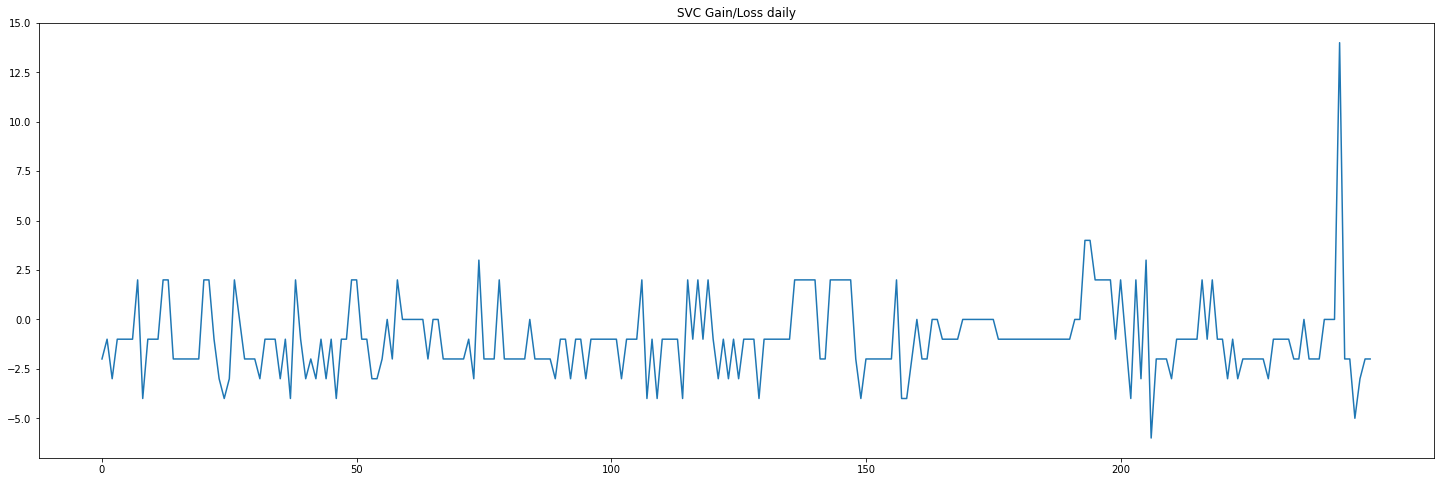

In [17]:
#svc
plt.figure(figsize=(25,8))
plt.title("SVC Gain/Loss daily")
plt.xticks(np.arange(0, 250, 50))
plt.plot(data_pred_svc['Day'],data_pred_svc['gain/loss'])
plt.show()

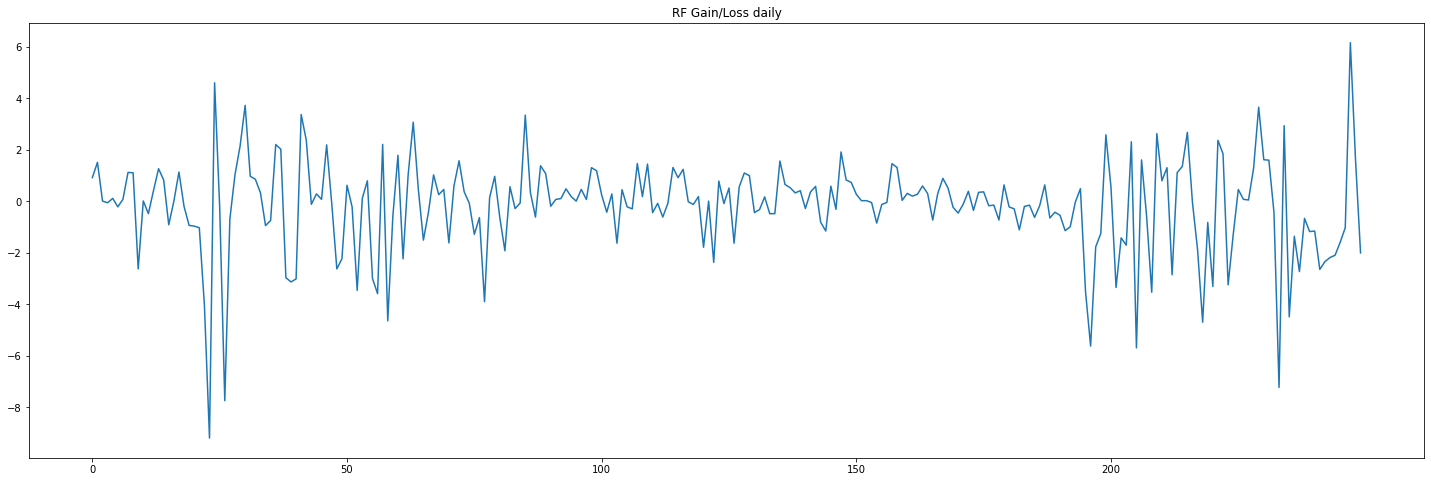

In [18]:
#random forest
plt.figure(figsize=(25,8))
plt.title("RF Gain/Loss daily")
plt.xticks(np.arange(0, 250, 50))
plt.plot(data_pred_regressor['Day'],data_pred_regressor['gain/loss'])
plt.show()

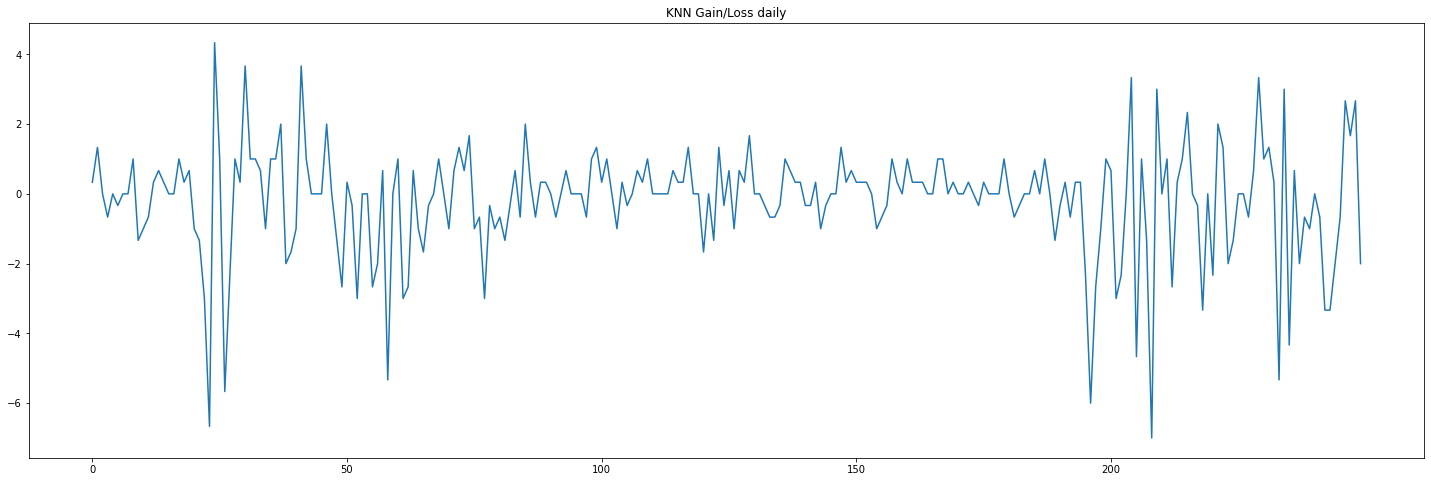

In [19]:
#KNN
plt.figure(figsize=(25,8))
plt.title("KNN Gain/Loss daily")
plt.xticks(np.arange(0, 250, 50))
plt.plot(data_pred_knn['Day'],data_pred_knn['gain/loss'])
plt.show()

**Plotting the ratio of daily gains to losses**

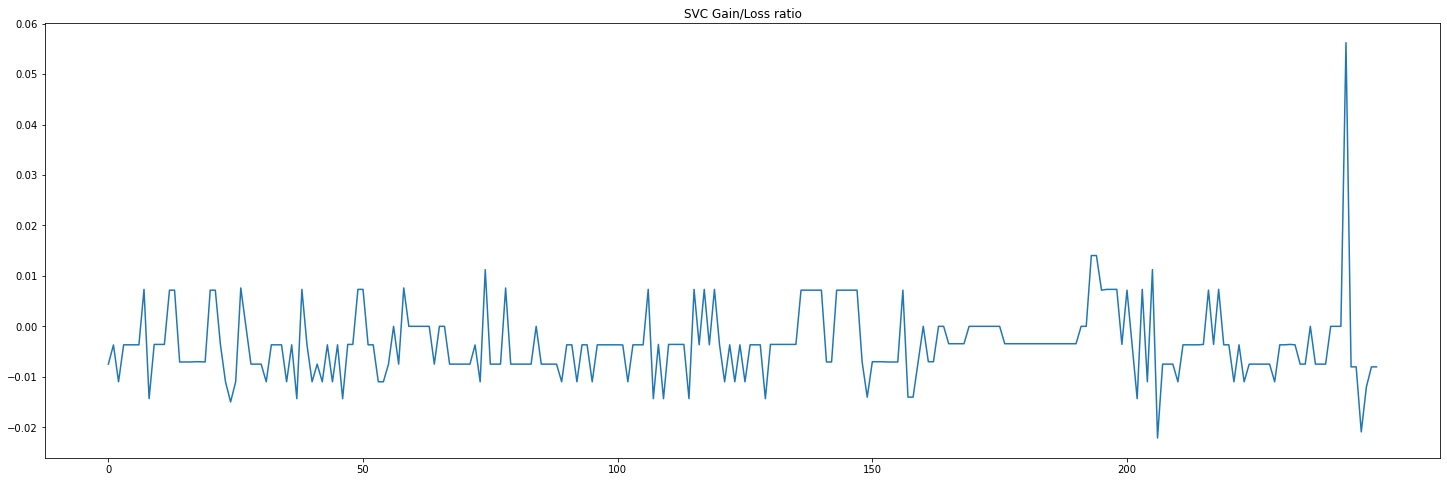

In [20]:
#svc
plt.figure(figsize=(25,8))
plt.title("SVC Gain/Loss ratio")
plt.xticks(np.arange(0, 250, 50))
plt.plot(data_pred_svc['Day'],data_pred_svc['ratio'])
plt.show()

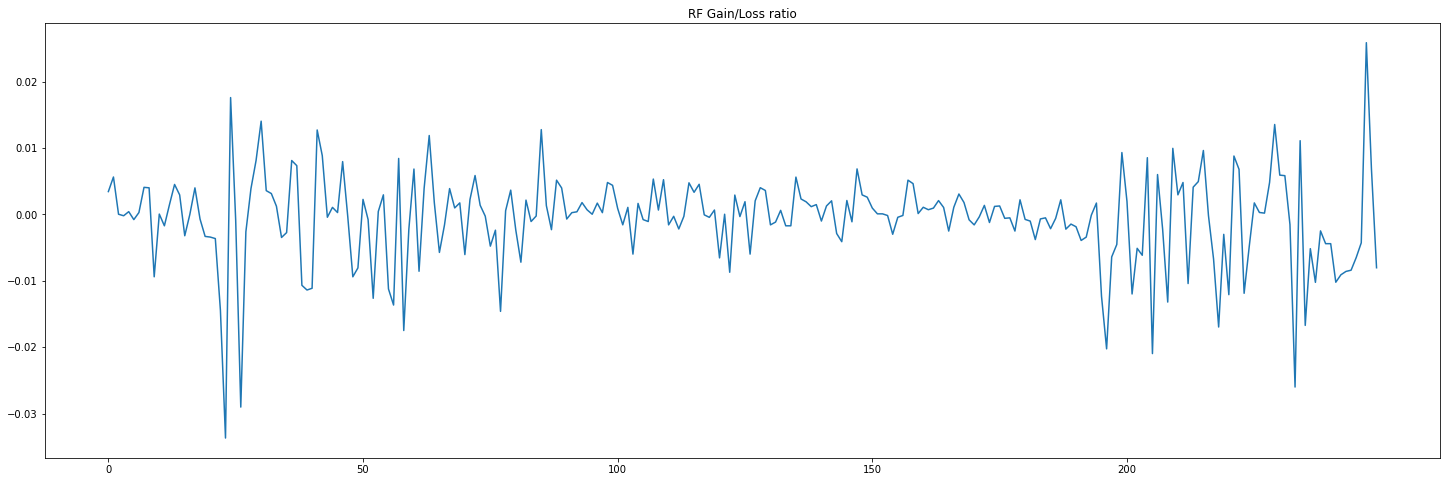

In [21]:
#Random Forest
plt.figure(figsize=(25,8))
plt.xticks(np.arange(0, 250, 50))
plt.title("RF Gain/Loss ratio")
plt.plot(data_pred_regressor['Day'],data_pred_regressor['ratio'])
plt.show()

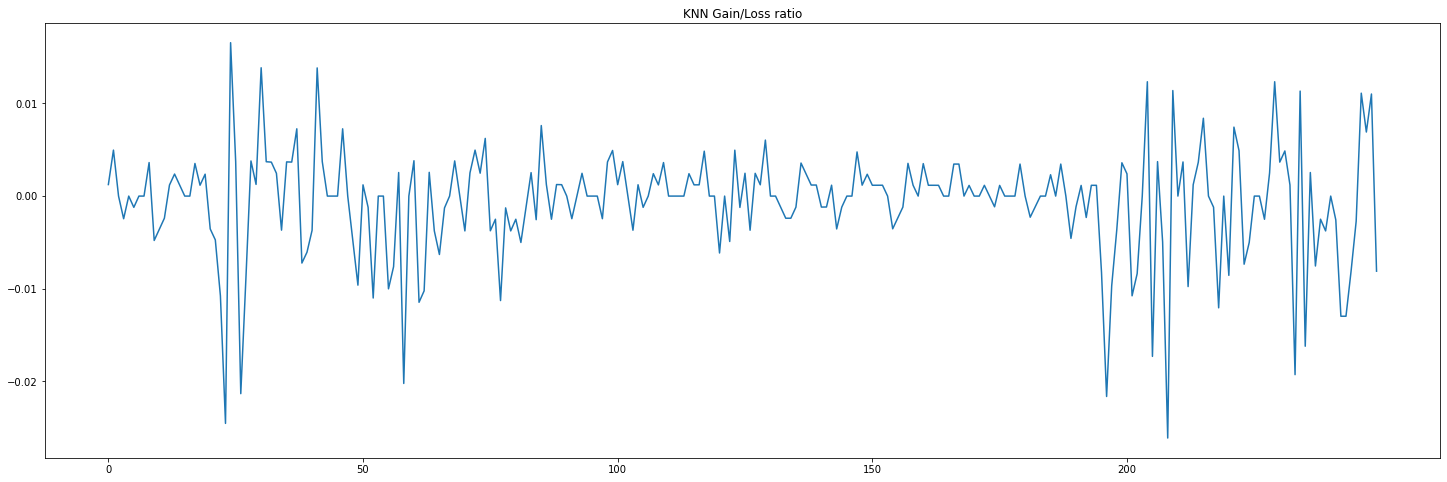

In [22]:
#KNN
plt.figure(figsize=(25,8))
plt.xticks(np.arange(0, 250, 50))
plt.title("KNN Gain/Loss ratio")
plt.plot(data_pred_knn['Day'],data_pred_knn['ratio'])
plt.show()

**Calculating the Sharpe ratio**

In [23]:
def profit(data_pred):
    return data_pred.mean().sum()
def std(profit):
    return profit.std()

In [24]:
print(f"Annual profit for svc: {profit(data_pred_svc['gain/loss'])}")
print(f"Sharp ratio for svc: {profit(data_pred_svc['gain/loss']) / std(data_pred_svc['gain/loss'])}")
print(f"Buy and hold model  profit for svc: {profit(df_buy_and_hold_svc['gain/loss'])}")
print(f"Buy and hold model Sharp ratio for svc: {(profit(df_buy_and_hold_svc['gain/loss']) / std(df_buy_and_hold_svc['gain/loss']))}")
print("-----------------------------------------------------------------------")
print(f"Annual profit for Random Forest: {profit(data_pred_regressor['gain/loss'])}")
print(f"Sharp ratio for Random Forest: {profit(data_pred_regressor['gain/loss']) / std(data_pred_regressor['gain/loss'])}")
print(f"Buy and hold model  profit for Random Forest: {profit(df_buy_and_hold_regressor['gain/loss'])}")
print(f"Buy and hold model Sharp ratio for Random Forest: {profit(df_buy_and_hold_regressor['gain/loss']) / std(df_buy_and_hold_regressor['gain/loss'])} ")
print("-----------------------------------------------------------------------")
print(f"Annual profit for knn: {profit(data_pred_knn['gain/loss'])}")
print(f"Sharp ratio for knn: {profit(data_pred_knn['gain/loss']) / std(data_pred_knn['gain/loss'])}")
print(f"Buy and hold model  profit for knn: {profit(df_buy_and_hold_knn['gain/loss'])}")
print(f"Buy and hold model Sharp ratio for knn: {profit(df_buy_and_hold_knn['gain/loss']) / std(df_buy_and_hold_knn['gain/loss'])}")

Annual profit for svc: -0.968
Sharp ratio for svc: -0.49721924420447533
Buy and hold model  profit for svc: 1.476923076923077
Buy and hold model Sharp ratio for svc: 0.762337799466492
-----------------------------------------------------------------------
Annual profit for Random Forest: -0.1929734386724358
Sharp ratio for Random Forest: -0.10353117448195666
Buy and hold model  profit for Random Forest: 1.0358186050607319
Buy and hold model Sharp ratio for Random Forest: 1.0114053208409988 
-----------------------------------------------------------------------
Annual profit for knn: -0.1826666666666672
Sharp ratio for knn: -0.11405772987401949
Buy and hold model  profit for knn: 0.6604166666666652
Buy and hold model Sharp ratio for knn: 0.784955753675575


**Calculating cf-var for D-ratio**

In [25]:
""""Reference: Dessain, J., (2022), ‘Machine learning models predicting returns: 
Why most popular performance metrics are misleading and proposal for an efficient metric’, 
Expert Systems with Applications, 199(1), 
pp. 116970. Available at: https://doi.org/10.1016/j.eswa.2022.116970
https://github.com/JDE65/D-ratio/blob/main/d_ratio.py"""

def risk_skew_kurt(model_return):
    mean = np.mean(model_return)
    st_dev = np.std(model_return)
    skew = stats.skew(model_return)
    kurt = stats.kurtosis(model_return)
    return (mean, st_dev), (skew, kurt)

def risk_cf_exp_var(model_return, asset_value=100, confid=0.1):
	    (mean, st_dev), (skew, kurt) = risk_skew_kurt(model_return)
	    quantile = norm.ppf(confid)
	    cf_exp = quantile + (quantile ** 2 - 1) * skew / 6 
	    + (quantile ** 3 - 3 * quantile) * kurt / 24 
	    - (2 * quantile ** 3 - 5 * quantile) * (skew ** 2) / 36
	    cf_var = mean + st_dev * cf_exp
	    cf_asset_value = asset_value * (1 + cf_var)
	    return cf_exp, cf_var, cf_asset_value



**Calculating the D-rerturn, D-var, and D-ratio**

In [26]:
# Calculation of D-ratio. There are 252 trading days in the year

a = profit(data_pred_svc['gain/loss']) - profit(df_buy_and_hold_svc['gain/loss'])
a_ = math.log(abs(a)) * 252


b = (profit(df_buy_and_hold_svc['gain/loss']))
b_ = math.log(abs(b)) * 252


e = profit(data_pred_svc['gain/loss'])
e_ = math.log(abs(e)) * 252
cf_exp, cf_var, cf_asset_value = risk_cf_exp_var(e_)


f = profit(df_buy_and_hold_svc['gain/loss'])
f_ = math.log(abs(f)) * 252
cf_exp1, cf_var1, cf_asset_value1 = risk_cf_exp_var(f_)


d_return = ((1 + a_) / b_)
print("SVC D-return = ", d_return)

d_var = cf_var / cf_var1
print("SVC D-var = ", d_var)

d_ratio = (d_return * d_var)
print("SVC D-Ratio = ", d_ratio)

SVC D-return =  2.3027484687404978
SVC D-var =  -0.08340115613235509
SVC D-Ratio =  -0.19205188457496786


In [27]:
a = profit(data_pred_regressor['gain/loss']) - profit(df_buy_and_hold_regressor['gain/loss'])
a_ = math.log(abs(a)) * 252


b = (profit(df_buy_and_hold_regressor['gain/loss']))
b_ = math.log(abs(b)) * 252


e = profit(data_pred_regressor['gain/loss'])
e_ = math.log(abs(e)) * 252
cf_exp, cf_var, cf_asset_value = risk_cf_exp_var(e_)


f = profit(df_buy_and_hold_regressor['gain/loss'])
f_ = math.log(abs(f)) * 252
cf_exp1, cf_var1, cf_asset_value1 = risk_cf_exp_var(f_)

d_return = ((1 + a_) / b_)
print("RF-Regressor D-return = ", d_return)

d_var = cf_var / cf_var1
print("RF- Regressor D-var = ", d_var)

d_ratio = (d_return * d_var)
print("RF- Regressor D-Ratio = ", d_ratio)

RF-Regressor D-return =  5.967255130108931
RF- Regressor D-var =  -46.749289597442264
RF- Regressor D-Ratio =  -278.96493817928547


In [28]:
a = profit(data_pred_knn['gain/loss']) - profit(df_buy_and_hold_knn['gain/loss'])
a_ = math.log(abs(a)) * 252


b = (profit(df_buy_and_hold_knn['gain/loss']))
b_ = math.log(abs(b)) * 252


e = profit(data_pred_knn['gain/loss'])
e_ = math.log(abs(e)) * 252
cf_exp, cf_var, cf_asset_value = risk_cf_exp_var(e_)


f = profit(df_buy_and_hold_knn['gain/loss'])
f_ = math.log(abs(f)) * 252
cf_exp1, cf_var1, cf_asset_value1 = risk_cf_exp_var(f_)


d_return = ((1 + a_) / b_)
print("knn D-return = ", d_return)

d_var = cf_var / cf_var1
print("knn D-var = ", d_var)

d_ratio = (d_return * d_var)
print("knn D-Ratio = ", d_ratio)

knn D-return =  0.4018498808718209
knn D-var =  4.097750041803664
knn D-Ratio =  1.6466803661413014
